In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('googleplaystore.csv')
df = (df.sort_values(['Category', 'Rating'], ascending = [True, False])
      .where(df['Rating'] <= 5.0)
      .set_index('App')
      .dropna()
      .drop('Reviews', axis = 1)
      .drop_duplicates())

## Top Downloads

In [4]:
df.sort_values('Installs', ascending = False).head(5)

,Category,Rating,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
App,,,,,,,,,,,
Google Calendar,PRODUCTIVITY,4.2,Varies with device,"500,000,000+",Free,0,Everyone,Productivity,"August 6, 2018",Varies with device,Varies with device
SHAREit - Transfer & Share,TOOLS,4.6,17M,"500,000,000+",Free,0,Everyone,Tools,"July 30, 2018",4.5.28_ww,4.1 and up
Candy Crush Saga,FAMILY,4.4,74M,"500,000,000+",Free,0,Everyone,Casual,"July 5, 2018",1.129.0.2,4.1 and up
Candy Crush Saga,GAME,4.4,74M,"500,000,000+",Free,0,Everyone,Casual,"July 5, 2018",1.129.0.2,4.1 and up
Microsoft Word,PRODUCTIVITY,4.5,Varies with device,"500,000,000+",Free,0,Everyone,Productivity,"July 11, 2018",16.0.10325.20043,4.4 and up


## Top Paid Downloads

In [5]:
paidApp = df[df['Type'] == 'Paid']
paidApp.sort_values('Installs', ascending = False).head(5)

,Category,Rating,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
App,,,,,,,,,,,
Toca Life: City,FAMILY,4.7,24M,"500,000+",Paid,$3.99,Everyone,Education;Pretend Play,"July 6, 2018",1.5-play,4.4 and up
Weather Live,WEATHER,4.5,Varies with device,"500,000+",Paid,$5.99,Everyone,Weather,"November 21, 2017",Varies with device,Varies with device
NBA JAM by EA SPORTS™,FAMILY,4.3,43M,"500,000+",Paid,$4.99,Everyone,Sports;Action & Adventure,"February 8, 2017",04.00.40,2.3 and up
Toca Life: City,EDUCATION,4.7,24M,"500,000+",Paid,$3.99,Everyone,Education;Pretend Play,"July 6, 2018",1.5-play,4.4 and up
Farming Simulator 16,FAMILY,4.2,14M,"500,000+",Paid,$2.99,Everyone,Simulation;Education,"April 10, 2018",1.1.1.6,4.0.3 and up


## Types of Content Rating

In [6]:
df['Content Rating'].unique().tolist()

['Everyone',
 'Everyone 10+',
 'Teen',
 'Mature 17+',
 'Adults only 18+',
 'Unrated']

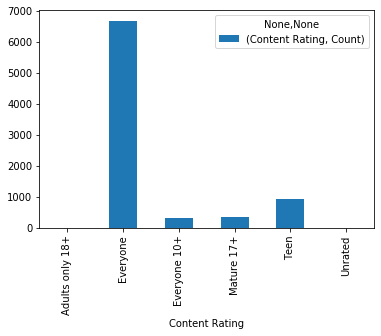

In [58]:
RatingCount = df.groupby('Content Rating').agg({'Content Rating' : {'Count' : len}})
RatingCount.plot(kind = 'bar')
#df.groupby('Content Rating')['Content Rating'].agg(len)#.tolist()

## Types of Category

In [8]:
df['Category'].unique().tolist()

['ART_AND_DESIGN',
 'AUTO_AND_VEHICLES',
 'BEAUTY',
 'BOOKS_AND_REFERENCE',
 'BUSINESS',
 'COMICS',
 'COMMUNICATION',
 'DATING',
 'EDUCATION',
 'ENTERTAINMENT',
 'EVENTS',
 'FAMILY',
 'FINANCE',
 'FOOD_AND_DRINK',
 'GAME',
 'HEALTH_AND_FITNESS',
 'HOUSE_AND_HOME',
 'LIBRARIES_AND_DEMO',
 'LIFESTYLE',
 'MAPS_AND_NAVIGATION',
 'MEDICAL',
 'NEWS_AND_MAGAZINES',
 'PARENTING',
 'PERSONALIZATION',
 'PHOTOGRAPHY',
 'PRODUCTIVITY',
 'SHOPPING',
 'SOCIAL',
 'SPORTS',
 'TOOLS',
 'TRAVEL_AND_LOCAL',
 'VIDEO_PLAYERS',
 'WEATHER']

## Top Games

In [9]:
TopGames = df[df['Category'] == 'GAME'].sort_values('Installs', ascending = False)
TopGames.head(5)

,Category,Rating,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
App,,,,,,,,,,,
Pou,GAME,4.3,24M,"500,000,000+",Free,0,Everyone,Casual,"May 25, 2018",1.4.77,4.0 and up
Temple Run 2,GAME,4.3,62M,"500,000,000+",Free,0,Everyone,Action,"July 5, 2018",1.49.1,4.0 and up
My Talking Tom,GAME,4.5,Varies with device,"500,000,000+",Free,0,Everyone,Casual,"July 19, 2018",4.8.0.132,4.1 and up
Candy Crush Saga,GAME,4.4,74M,"500,000,000+",Free,0,Everyone,Casual,"July 5, 2018",1.129.0.2,4.1 and up
Who am I? (Biblical),GAME,4.5,5.1M,"500,000+",Free,0,Everyone,Trivia,"September 13, 2017",1.2.2_comAds,4.0.3 and up
